# Q.1 

Examples of Applications:

Market Segmentation: Grouping customers based on purchasing behavior, demographics, or preferences to tailor marketing strategies.
Image Segmentation: Dividing an image into regions or objects for object recognition or image analysis.
Document Clustering: Organizing a large collection of documents into categories for easier retrieval and management.
Anomaly Detection: Identifying unusual patterns or outliers in data, such as fraudulent transactions in financial systems.
Biology: Clustering gene expression data to identify genes with similar expression patterns across different conditions or tissues.

# Q.2 

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that groups data points based on their density in the data space. Unlike K-means and hierarchical clustering, DBSCAN does not require specifying the number of clusters in advance and can find clusters of arbitrary shape and size.

#### Differences:

1. Density-Based vs. Centroid/Hierarchy-Based: DBSCAN groups points based on density, while K-means uses centroids and hierarchical clustering uses nested groupings.
2. No Need for Number of Clusters: DBSCAN does not require the number of clusters to be specified beforehand, unlike K-means.
3. Handling Noise: DBSCAN can identify noise or outliers as points that do not belong to any cluster, whereas K-means may not handle noise well.
4. Cluster Shape: DBSCAN can find clusters of arbitrary shapes, whereas K-means is limited to spherical clusters.

# Q.3

Epsilon (ε) and Minimum Points (MinPts) are crucial parameters in DBSCAN:

Epsilon (ε): Defines the maximum distance between two points for one to be considered as in the neighborhood of the other.

Method: Use a k-distance plot, where you plot the distance to the k-th nearest neighbor (typically k=MinPts) for each point. The "elbow" point in this plot can suggest an appropriate ε value.
Minimum Points (MinPts): The minimum number of points required to form a dense region.

Rule of Thumb: MinPts should be at least one more than the number of dimensions of the dataset (MinPts ≥ dimensions + 1). For most datasets, values between 4 and 10 are common.

# Q.4 

DBSCAN naturally identifies outliers as points that do not belong to any cluster. These points:

Do not have enough neighbors within the epsilon distance to be considered part of a cluster.
Are classified as noise points and are labeled accordingly.

# Q.5 

Cluster Shape: DBSCAN can find clusters of arbitrary shape, while K-means assumes spherical clusters.
Parameters: DBSCAN requires ε and MinPts, while K-means requires the number of clusters (K).
Outliers: DBSCAN can detect and label outliers, while K-means tends to include outliers within clusters.
Initialization Sensitivity: DBSCAN is less sensitive to the initial parameter choice than K-means is to the initial centroid placement.

# Q.6 

Yes, DBSCAN can be applied to high-dimensional datasets, but challenges include:

Curse of Dimensionality: As dimensionality increases, the distance between points becomes less meaningful, making it harder to determine an appropriate epsilon.
Computational Complexity: High-dimensional datasets require more computational resources for distance calculations.
Parameter Sensitivity: Choosing suitable values for ε and MinPts becomes more difficult.

# Q.7

DBSCAN struggles with clusters of varying densities because a single global ε and MinPts may not be suitable for all clusters:

Higher Density Clusters: May merge with nearby lower density regions if ε is too large.
Lower Density Clusters: May be split into multiple smaller clusters if ε is too smal

# Q.8

Common evaluation metrics for DBSCAN include:

Silhouette Score: Measures how similar a point is to its own cluster compared to other clusters.
Davies-Bouldin Index: Evaluates the average similarity ratio of each cluster with the cluster that is most similar to it.
Adjusted Rand Index (ARI): Measures the similarity between the clustering results and a ground truth classification, accounting for chance.
Homogeneity and Completeness: Homogeneity measures whether clusters contain only similar points, while completeness measures whether all similar points are assigned to the same cluster.

# Q.9

Yes, DBSCAN can be used in semi-supervised learning tasks:

Initial Clustering: Use DBSCAN to identify dense regions (clusters) and noise points.
Label Propagation: Propagate labels from labeled points within clusters to unlabeled points.
Handling Noise: Noise points identified by DBSCAN can be treated separately or used to refine the model.

# Q.10

Handling Noise:

DBSCAN inherently identifies and labels noise points, treating them as outliers.
Handling Missing Values:

Preprocessing Required: Typically, missing values need to be imputed or handled before applying DBSCAN, as the algorithm relies on distance measures that require complete data.

# Q.11

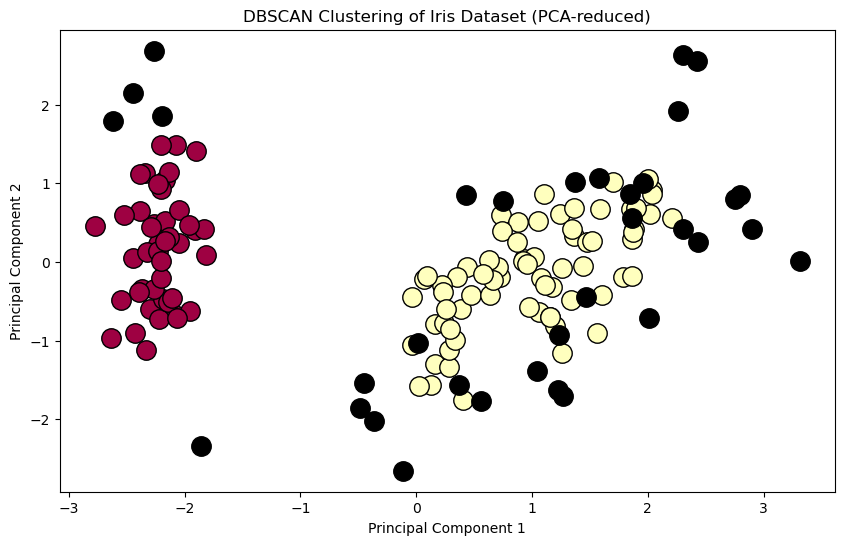

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
iris = load_iris()
X = iris.data

# Standardize the features
X = StandardScaler().fit_transform(X)

# Apply PCA for visualization (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot the results
plt.figure(figsize=(10, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = X_pca[class_member_mask]

    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

plt.title('DBSCAN Clustering of Iris Dataset (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
